In [1]:
import numpy as np 
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import mean_squared_log_error

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime

### Cargar los datos

In [2]:
df = pd.read_csv("monthly-milk-production-pounds.csv", index_col=0, parse_dates=[0])

### Variable para el modelos

In [3]:
# CONSTANTES 
LAG = 12  # lagged values

In [4]:
def getParametres(tuned_parameters,X_train,y_train):
    
    print("# Tuning hyper-parameters for")
    print()
    clf = GridSearchCV(SVR(), tuned_parameters,cv=5, scoring='neg_mean_squared_error')
    clf.fit(X_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()  
        
        #svr_poly = svm.SVR(kernel='poly',C=c,gamma=0.1, epsilon=.1).fit(X_train,y_train)

### Recortar los datos 

In [5]:
def window(ds, lags):
    tmp_ind = ds.index.to_numpy()[lags:]
    for i in range(lags):
        tmp = ds.iloc[:, 0].shift(-(i+1))
        ds = pd.concat([ds, tmp], axis=1)
        
    ds = ds.dropna()
    ds.index = tmp_ind
        
    return ds

ndf = window(df, LAG)

train_data = ndf[:'1974-12-31'].to_numpy()
test_data  = ndf['1974-12-31':].to_numpy()


In [6]:
print('Observaciones: %d' % (len(ndf)))
print('Dataset de entrenamiento:',train_data.shape)
print('Dataset de prueba:', test_data.shape)

Observaciones: 156
Dataset de entrenamiento: (144, 13)
Dataset de prueba: (12, 13)


In [7]:
X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

In [8]:
y_test

array([834., 782., 892., 903., 966., 937., 896., 858., 817., 827., 797.,
       843.])

### Obtener los parametros

In [9]:
#Obtencion de parametros

#tuned_parameters = {'kernel': ('rbf','linear','poly'), 
#                    'C': [0.1, 0.001, 0.001,10, 5,10,100,50],
#                    'degree': [1,3,5,8],
#                   'coef0': [0.001,0.01,0.1,1,10,0.5],
#                    'gamma': [0.0001, 0.001, 0.005, 0.1, 1,0.01, 3, 5]}
                     
# Designate distributions to sample hyperparameters from 
#getParametres(tuned_parameters,X_train,y_train)


svr_rbf = svm.SVR(kernel='linear',C=100)
svr_rbf.fit(X_train,y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [10]:
trainPredict = svr_rbf.predict(X_train)
testPredict = svr_rbf.predict(X_test)

In [11]:
# predice con las matrices de entrenamiento y prueba

# invert predictions
trainY = [y_train]
testY = [y_test]

print("Training R^2 RBF=", round(svr_rbf.score(X_train,y_train),3))
print("Testing R^2 RBF=", round(svr_rbf.score(X_test,y_test),3))

#c=1
#svr_rbf = svm.SVR(kernel='rbf',C=c,gamma=0.1, epsilon=.1).fit(X_train,y_train)
#svr_lin = svm.SVR(kernel='linear',C=c,gamma=0.1, epsilon=.1).fit(X_train,y_train)
#svr_poly = svm.SVR(kernel='poly',C=c,gamma=0.1, epsilon=.1).fit(X_train,y_train)

#print("Testing R^2 RBF=", round(svr_rbf.score(X_test,y_test),3))
#print("Testing R^2 linear=", round(svr_lin.score(X_test,y_test),3))
#print("Testing R^2 poly=", round(svr_poly.score(X_test,y_test),3))

Training R^2 RBF= 0.974
Testing R^2 RBF= 0.88


### Resultados de la predicción

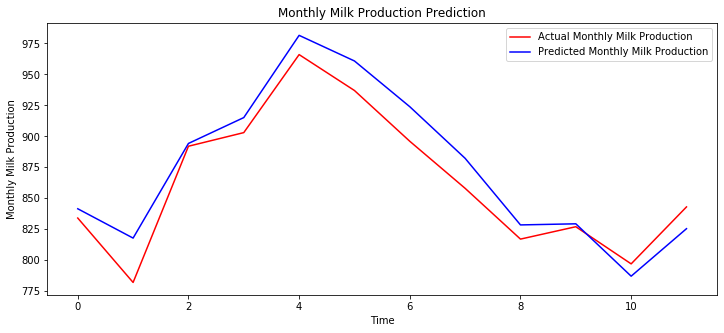

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

ax.plot(testY[0], color = 'red', label ="Actual Monthly Milk Production")
ax.plot(testPredict, color='blue', label = 'Predicted Monthly Milk Production')
plt.title("Monthly Milk Production Prediction")
plt.xlabel('Time')
plt.ylabel('Monthly Milk Production')
plt.legend(loc='best')
plt.show()